 #  Obtaining the Data

In [1]:
#Imported the neccessary python DataFrame(pandas,numpy,matplotlib,seaborn) for data loading,reading, 
#manupulation and visualisation.

import pandas as pd                          
import numpy as np                            
import matplotlib.pyplot as plt              
import seaborn as sns                        

In [2]:
# Stored the dataset into a dataframe using the pandas 'DF' function.
df=pd.read_csv('downloads/New_data_Set.csv')
df.head(3)           # head() show first 5 entries

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less


In [3]:
df.drop(columns=['Calls','Type','Billing'],inplace=True, axis=1)
df.head(3)    # In my opinion this column are not releveant for my operation so i am drooping it 

,Gender,Business,Dependancies,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less


In [4]:
df.tail(3)    # tail() show last 5 entries

,Gender,Business,Dependancies,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
4997,Male,0,No,No,74,192636.80,77054.720,9631.840,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,74,195970.70,78388.280,9798.535,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG
4999,Male,0,Yes,No,88,199970.74,79988.296,9998.537,627.839984,6003300,NaN,312.307316,311.081089,118.75,,72,PG


In [5]:
df.columns #columns of dataset

Index(['Gender', 'Business', 'Dependancies', 'Rating', 'Age', 'Salary',
       'Base_pay', 'Bonus', 'Unit_Price', 'Volume', 'openingbalance',
       'closingbalance', 'low', 'Unit_Sales', 'Total_Sales', 'Months',
       'Education'],
      dtype='object')

# Data Exploration

In [6]:
df.shape # The dataset consists  rows=5000, colums= 17. Each row represents an employee, and each column contains one employee attribute.

(5000, 17)

In [7]:
df.size # we ahve 100000 total entries

85000

In [8]:
df.dtypes #Checking for datatypes of column, some of columns are an appropriate(total_sales) is not in correct
           #datatypes format need to correct their format to do correct operations/analysis.
          

Gender             object
Business            int64
Dependancies       object
Rating             object
Age                 int64
Salary            float64
Base_pay          float64
Bonus             float64
Unit_Price        float64
Volume              int64
openingbalance    float64
closingbalance    float64
low               float64
Unit_Sales        float64
Total_Sales        object
Months              int64
Education          object
dtype: object

In [9]:
df['Total_Sales']=pd.to_numeric(df['Total_Sales'],errors='coerce') #converting into correct  datatypes format

In [10]:
df.dtypes # now all the column are in their correct datatypes.

Gender             object
Business            int64
Dependancies       object
Rating             object
Age                 int64
Salary            float64
Base_pay          float64
Bonus             float64
Unit_Price        float64
Volume              int64
openingbalance    float64
closingbalance    float64
low               float64
Unit_Sales        float64
Total_Sales       float64
Months              int64
Education          object
dtype: object

In [11]:
df.select_dtypes(include=np.number).columns.tolist()   # extracting the numerical numerical column it would help us to
                                                       #perform different types of numerical operations/analysis

['Business',
 'Age',
 'Salary',
 'Base_pay',
 'Bonus',
 'Unit_Price',
 'Volume',
 'openingbalance',
 'closingbalance',
 'low',
 'Unit_Sales',
 'Total_Sales',
 'Months']

In [12]:
df.select_dtypes(include=['object']).columns.tolist()  #extracting the categorical column it would help us to
                                                       #perform different types of categorical operations/analysis

['Gender', 'Dependancies', 'Rating', 'Education']

In [13]:
df.info() 


#concise summary of a DataFrame
# info gives us information about a DataFrame including the index dtype and column dtypes, non-null 
#values and memory usage.
# 5000 entries, 5000 rows, 17 col, col dtypes,all non null count,memory usage: 664.2+ KB, 9 col has 
#float val, 4 col is integer types and 4 is string type
# all we can quickly see with info function. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Rating          5000 non-null   object 
 4   Age             5000 non-null   int64  
 5   Salary          5000 non-null   float64
 6   Base_pay        4977 non-null   float64
 7   Bonus           5000 non-null   float64
 8   Unit_Price      5000 non-null   float64
 9   Volume          5000 non-null   int64  
 10  openingbalance  3524 non-null   float64
 11  closingbalance  5000 non-null   float64
 12  low             5000 non-null   float64
 13  Unit_Sales      5000 non-null   float64
 14  Total_Sales     4984 non-null   float64
 15  Months          5000 non-null   int64  
 16  Education       5000 non-null   object 
dtypes: float64(9), int64(4), object(4

In [14]:
df.isnull().sum() #checking null and handling null is most imp for successfull analysis,here we have two column with missing values 

Gender               0
Business             0
Dependancies         0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

<AxesSubplot:>

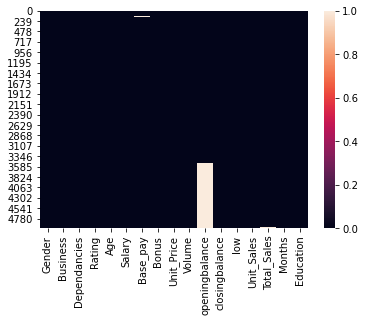

In [15]:
sns.heatmap(df.isna()) # Visualisation of mission value with heatmap

In [16]:
percent_missing = df['Base_pay'].isnull().sum() * 100 / len(df['Base_pay'])
percent_missing   # here a very less amount of null available and it cannot affect our result so i can remove it

0.46

In [17]:
df = df.dropna(axis=0, subset=['Base_pay'])

In [18]:
percent_missing = df['openingbalance'].isnull().sum() * 100 / len(df['openingbalance'])
percent_missing

#Here i have much ammount of mssing value so i cannot easily remove it because may be removing this much amount
#of missing value may affect our result so i would perform some operatins on that so that does not affect the result.

29.65641952983725

<AxesSubplot:>

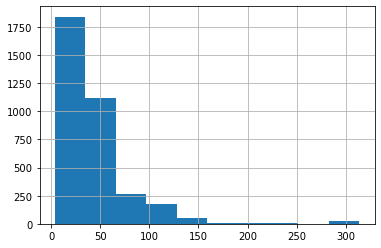

In [19]:
df['openingbalance'].hist()

# for openingbalance column the distribution is right skwewed so in this case we acn replace missing value 
#with the median value so that it avoid the skewness and try to fill the missing to ake it normal for better result. 

In [20]:
df['openingbalance'].fillna(df['openingbalance'].median(),inplace=True)
# here data is right skewed so i can fill it with median because we can use use median in skewed data to fill the null

In [21]:
percent_missing = df['Total_Sales'].isnull().sum() * 100 / len(df['Total_Sales'])
percent_missing  #very less amount of missing is available , can remove it 

0.3214788024914607

<AxesSubplot:>

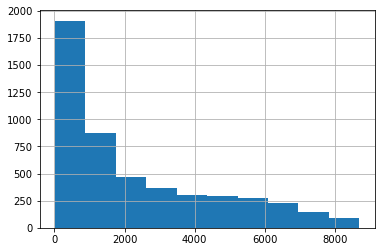

In [22]:
df['Total_Sales'].hist()

In [23]:
df = df.dropna(axis=0, subset=['Total_Sales']) # drop the missing value 

In [24]:
df.isnull().sum() #after operatin there is no any null value in dataset, now we can perform our operational part 

Gender            0
Business          0
Dependancies      0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
dtype: int64

<AxesSubplot:>

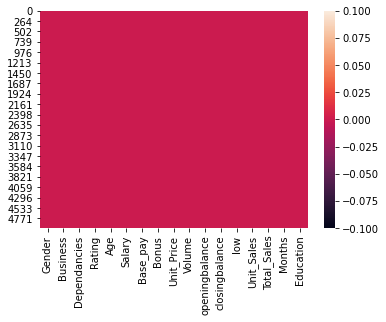

In [25]:
sns.heatmap(df.isnull()) # not any null value available here, heatmap representation

In [26]:
df[df.duplicated()] # no any duplicates value available in dataset

,Gender,Business,Dependancies,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education


In [27]:
df.describe() 

# statistical summary of dataset, quckly i can see that mean, median, std, max,min,and three important percentile of our dataset
# with describe we can make any statisttical decision, or statistical description,conclusion about data.

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
count,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4.961000e+03,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000
mean,0.160250,51.881072,99958.298698,40008.895192,4997.914935,50.617058,6.762826e+06,40.898820,43.350737,42.780688,64.995253,2282.786192,32.280589
std,0.366875,8.509788,24946.716919,10031.682829,1247.335846,48.096732,1.626007e+07,32.663566,35.986575,35.219401,29.978967,2267.794344,24.569804
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.250000,18.800000,0.000000
25%,0.000000,47.000000,84302.567720,33721.027090,4215.128386,25.840000,1.279900e+06,26.600000,22.100000,21.850000,36.000000,399.600000,9.000000
50%,0.000000,52.000000,100667.831800,40267.132730,5033.391590,39.310001,2.860300e+06,33.270000,33.380001,32.982074,70.550000,1404.650000,29.000000
75%,0.000000,57.000000,116911.794500,46764.717780,5845.589725,58.700001,6.205100e+06,42.740002,51.139999,50.410000,89.950000,3767.400000,55.000000
max,1.000000,88.000000,169149.707000,72278.720000,8457.485350,610.001045,3.208684e+08,313.903904,313.688694,307.399994,117.150000,8684.800000,72.000000


# Outliers Detection

Detecting outliers and handling that outliers is very important part because 
if we want to get good results in models or our analysis, we need to handle outliers.

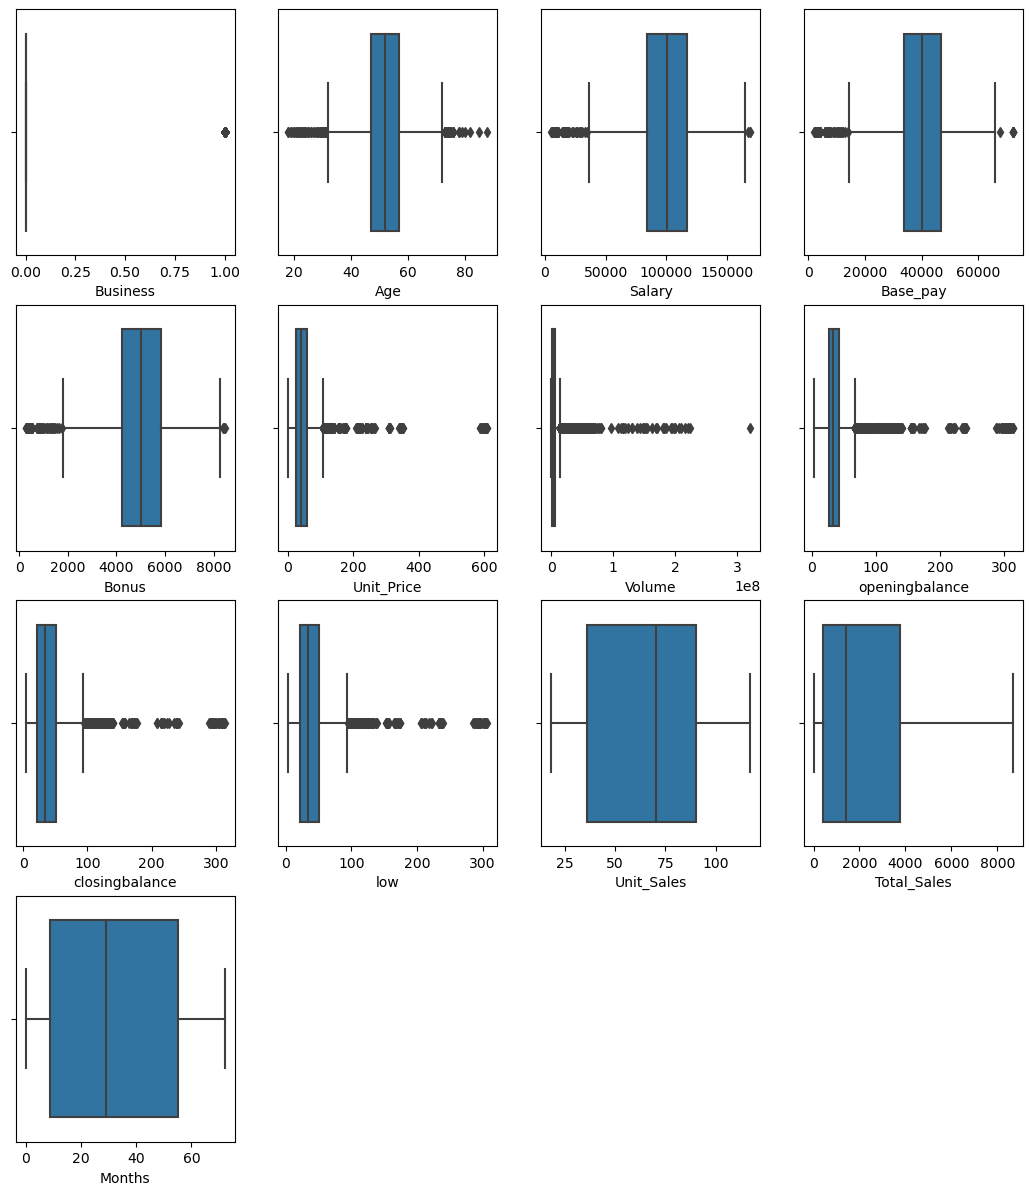

In [28]:
# here i choose boxplot to detect outliers becasuse with the help of box plot we can also see the median and 25,50,75 percentile.

df1=df.select_dtypes(exclude=['object']) #chhosing the numerical column to plot the boxplot for outliers detection 
import matplotlib.pyplot as plt
plt.figure(figsize=(13,15), dpi=100)
i=1
for column in df1:
        plt.subplot(4,4,i)
        sns.boxplot(data=df1, x=column)
        i=i+1

# Outliers Handling

# There is a lot of method to deal with the outliers handling like    
DROPPING THE OUTLIERS   
REPLACE THE OUTLIERS WITH MEDIAN/MEAN     
LOG TRANSFORMATION               
WINSORIZE METHOD 

In [29]:
from scipy.stats.mstats import winsorize
 #importing winsorize from scipy library

Among lot of method i chose winsorize method, because i do not know how outliers afffect our dataset it could be important
for analysis or could not be, so simply i cannot drop it , so i chose winsorise and take 2 percentile below and 98 percentile above 
mean that the value that is above the 98%tile will converted to the value that is at 98%percentile positon and in same manner the value 
that is below 2%tile will conveted to the value that is at the 2%tile position.

In [30]:
df['Age'].quantile(0.02) # 33 is lower limit

33.0

In [31]:
df['Age'].quantile(0.97)    # 67 is upper limit 

67.0

here lower limit is 33 and upper limit is 67 so my approch is to limit our data this two values. so will keep this approch for my 
entire outliers handling process.

<AxesSubplot:title={'center':'Age'}>

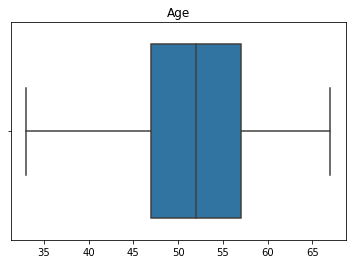

In [32]:
df['Age'].quantile(0.02)
df['Age'].quantile(0.97)
dd=winsorize(df.Age,(0.02,0.03))
plt.title('Age')
sns.boxplot(x=dd)

# age is imp feature for prediction/analysis so  here i can successfully handled the outliers 

<AxesSubplot:title={'center':'Salary'}>

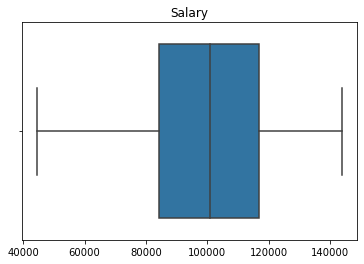

In [33]:
dd=winsorize(df.Salary,(0.02,0.03))
plt.title('Salary')
sns.boxplot(x=dd)
# our target column 

<AxesSubplot:title={'center':'Base Pay'}>

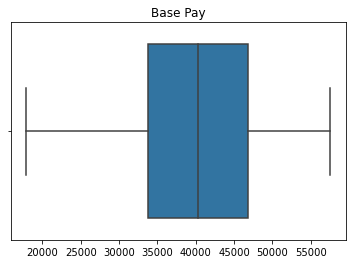

In [34]:
dd=winsorize(df.Base_pay,(0.02,0.03))
plt.title('Base Pay')
sns.boxplot(x=dd)

<AxesSubplot:title={'center':'Bonus'}>

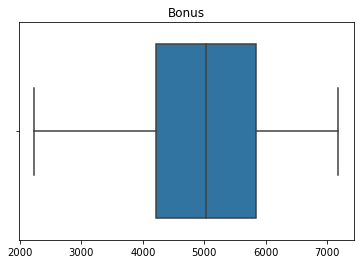

In [35]:
dd=winsorize(df1.Bonus,(0.02,0.03))
plt.title('Bonus')
sns.boxplot(x=dd)
#bonus is also one of the important feature for salary prediction , replaced all outliers 

<AxesSubplot:title={'center':'Unit Price'}>

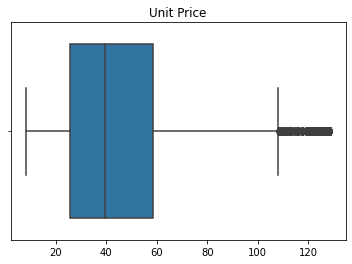

In [36]:
dd=winsorize(df.Unit_Price,(0.02,0.03))
plt.title('Unit Price')
sns.boxplot(x=dd)       # most of the data i customized with the winsorise method.

<AxesSubplot:title={'center':'Volume'}>

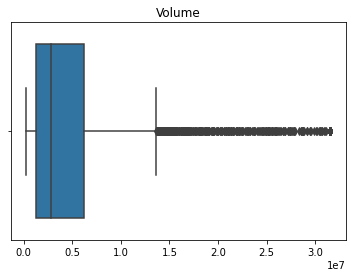

In [37]:
dd=winsorize(df.Volume,(0.01,0.03))
plt.title('Volume')
sns.boxplot(x=dd)

<AxesSubplot:title={'center':'opening balance'}>

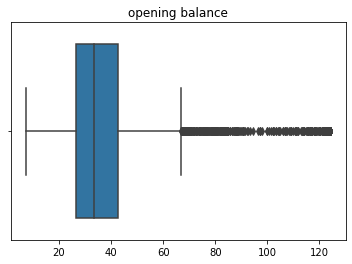

In [38]:
dd=winsorize(df.openingbalance,(0.01,0.03))
plt.title('opening balance')
sns.boxplot(x=dd)

# tried to customized the most of the outliers with winsorize

<AxesSubplot:title={'center':'closing balance'}>

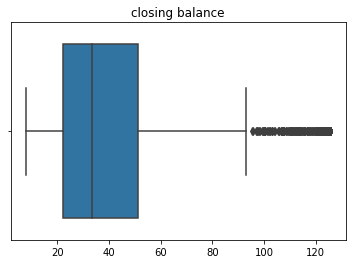

In [39]:
dd=winsorize(df.closingbalance,(0.02,0.03))
plt.title('closing balance')
sns.boxplot(x=dd)

<AxesSubplot:title={'center':'low'}>

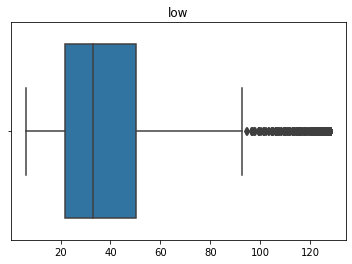

In [40]:
dd=winsorize(df.low,(0.01,0.02))
plt.title('low')
sns.boxplot(x=dd)


In [41]:
# Spearman rank correlation coefficient measures the monotonic(+ve monotonic-both variable increases, -ve monotonics-one var increses others will
#decreases ) relation between a pair of variables.

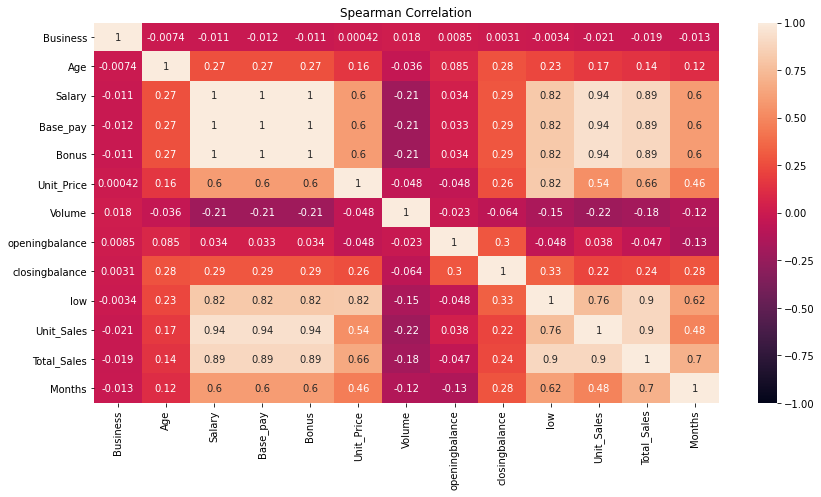

In [42]:
def spearman_corr(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(14,7))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)
display=spearman_corr(df)

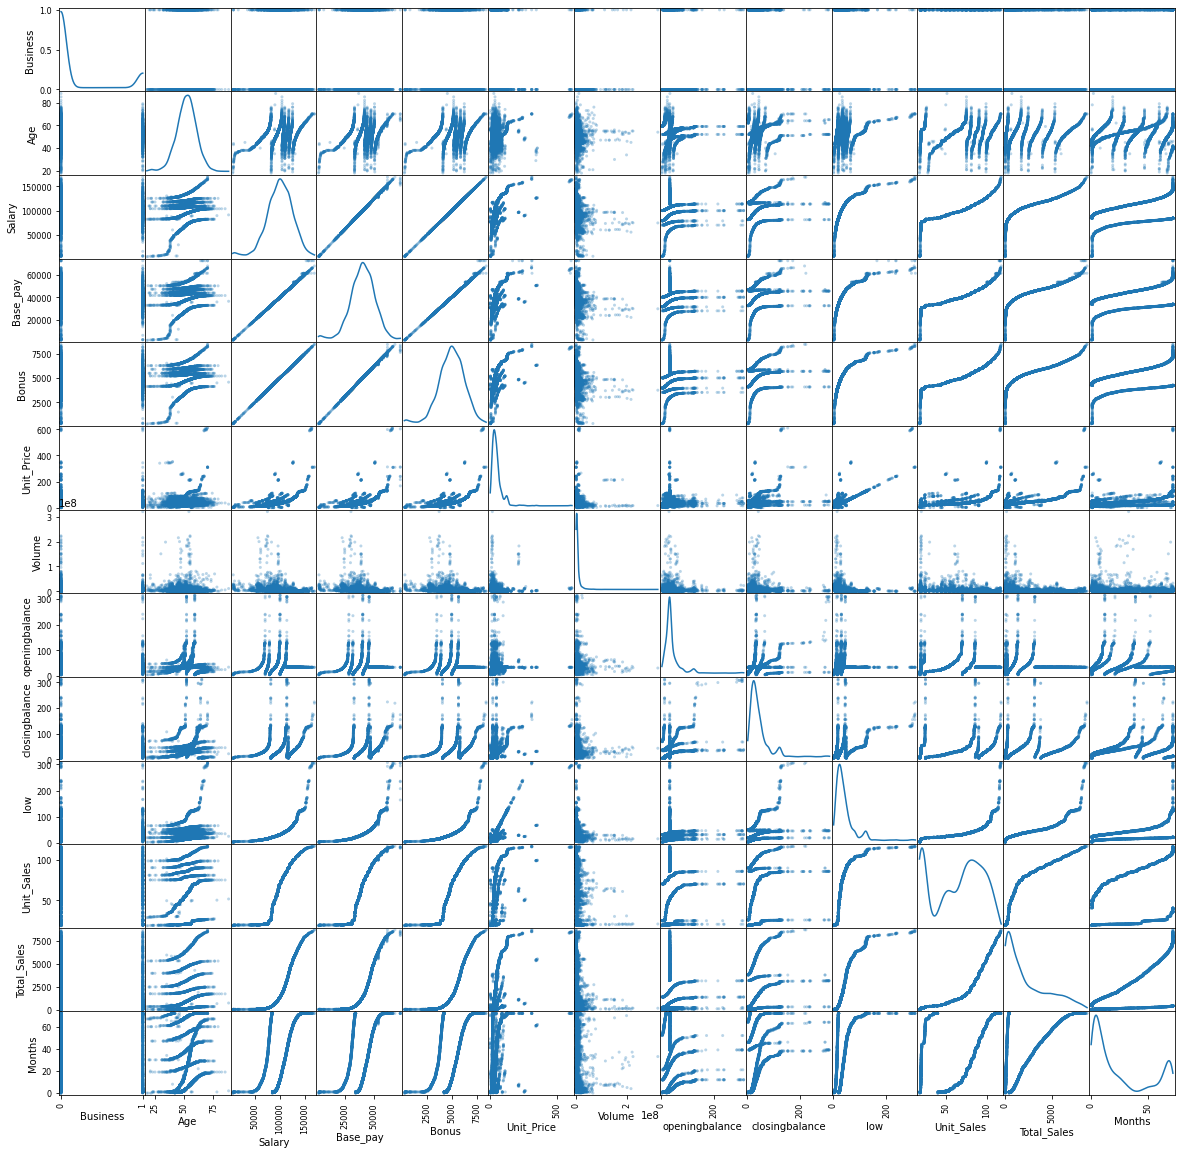

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = 0.3, figsize = (20,20), diagonal = 'kde')
plt.show()


#plotted the correlation with scatter_matrix to analyse the affect of one variable on the other, here we can easily
#identify which feature are monotinically descreaaing or increasing with the other variable

# Univariate Analysis

#histogram is best approch to see the distribution of dataset's columns/features 

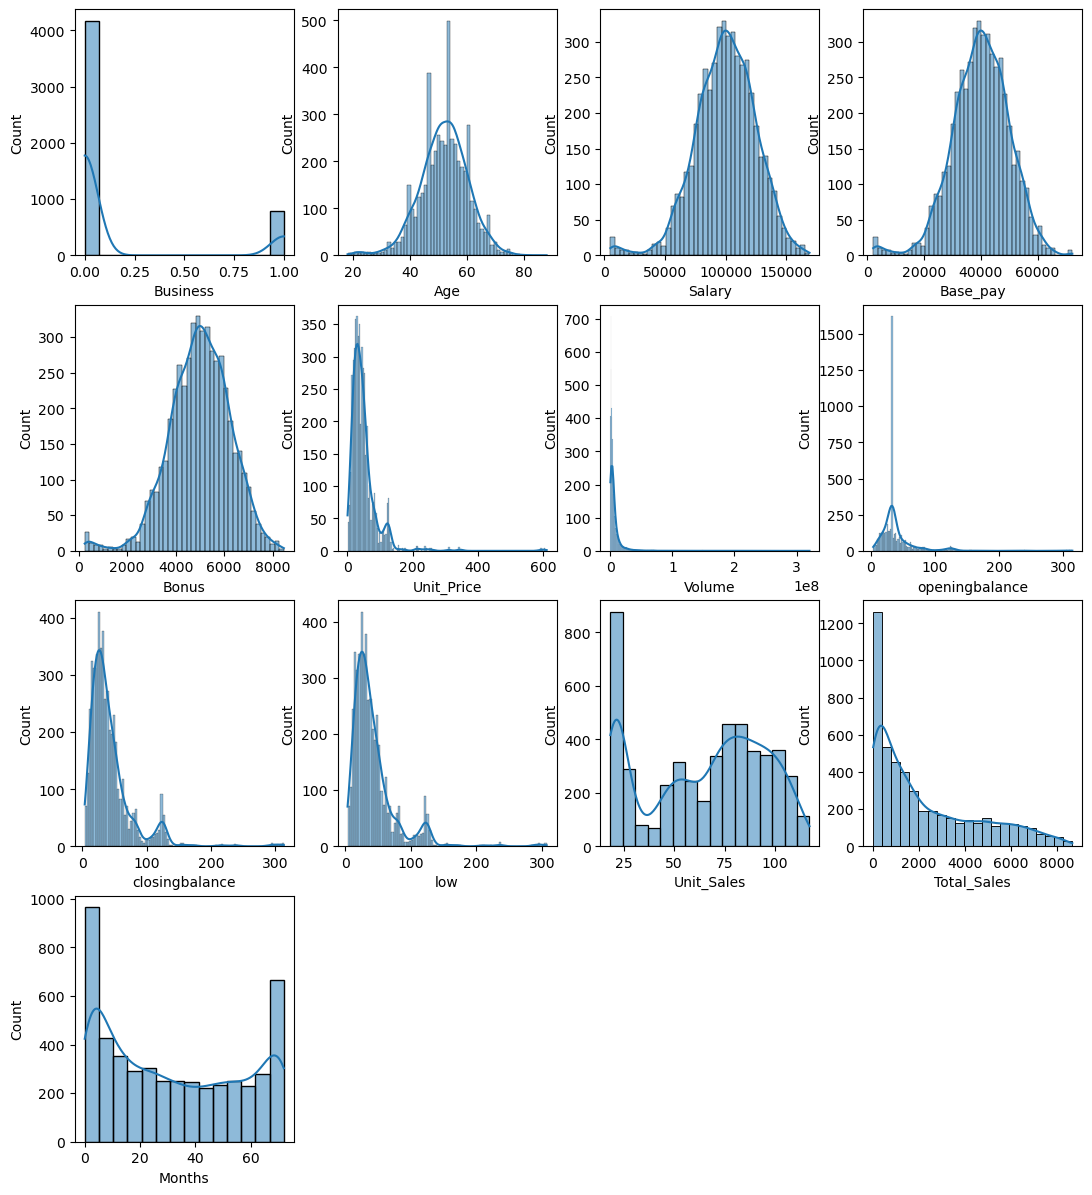

In [44]:
df1=df.select_dtypes(exclude=['object'])
import matplotlib.pyplot as plt
plt.figure(figsize=(13,15), dpi=100)
i=1
for column in df1:
        plt.subplot(4,4,i)
        sns.histplot(data=df1, x=column,kde=True)
        i=i+1
        
# here we can see that age,salary,base_pay.bonus,closing balance,unit sales are normally distributed, other columns are either right
#or left skewed 

In [45]:
df['Education'].value_counts()
# There is higher no of pg and graduation completed employees in this organization

PG                     2944
Graduation             1977
Intermediate             26
High School or less      14
Name: Education, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

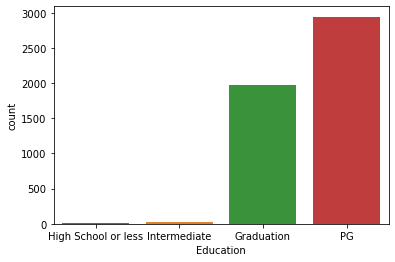

In [46]:
sns.countplot(df['Education']) #higher no of pg/graduation employees in there 

In [47]:
df['Gender'].value_counts()  #there is approximately equal no of male/female employees in the organization

Male      2504
Female    2457
Name: Gender, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

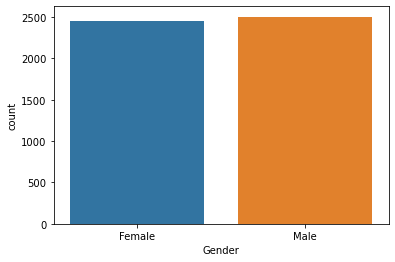

In [48]:
sns.countplot(df['Gender'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

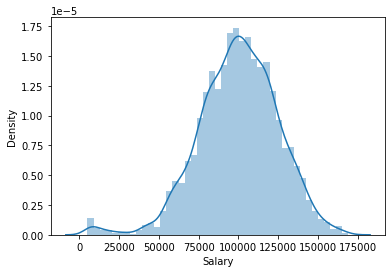

In [49]:
sns.distplot(df['Salary']) #salary is fairly distributed among the employees

In [50]:
df.groupby(['Gender'])['Salary'].mean() #avg salary for men is bit higher than female

Gender
Female     99421.002831
Male      100485.509538
Name: Salary, dtype: float64

In [51]:
df.groupby(['Education'])['Gender'].value_counts() #avg salary for men is bit higher than female

Education            Gender
Graduation           Female     993
                     Male       984
High School or less  Male         9
                     Female       5
Intermediate         Female      14
                     Male        12
PG                   Male      1499
                     Female    1445
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Months', ylabel='Count'>

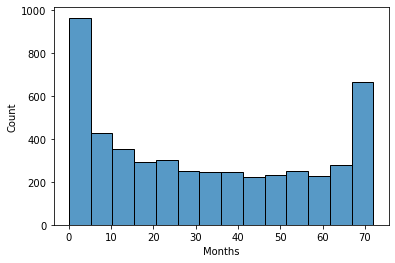

In [52]:
sns.histplot(df['Months'])
#Most no of employess in this organisation are fresher and, after that people with 5 to 6 yrs exp are more in this company 

In [53]:
df.groupby(['Gender'])['Base_pay'].mean()

Gender
Female    39793.160625
Male      40220.580427
Name: Base_pay, dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Base_pay', ylabel='Density'>

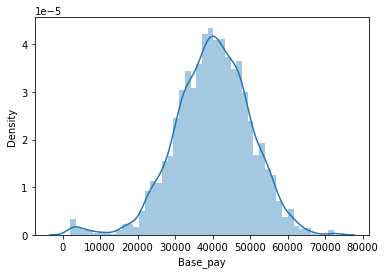

In [54]:
sns.distplot(df['Base_pay']) # bonus pay is also faitly distributed

In [55]:
df.groupby(['Gender'])['Total_Sales'].sum() # we can say that the total sales by male is little higher than female it 
                                                #may be because the of no of male is higher tha male  

Gender
Female    5545241.25
Male      5779661.05
Name: Total_Sales, dtype: float64

In [56]:
df['Business'].value_counts()    #There are 4166 employees who has their own business with the job 

0    4166
1     795
Name: Business, dtype: int64

In [57]:
df.groupby(['Business'])['Gender'].value_counts() # there are higher no of female having business with job 

Business  Gender
0         Male      2108
          Female    2058
1         Female     399
          Male       396
Name: Gender, dtype: int64

# Bivariate Analysis
Analysing Target variable with categorical & numerical features

In [58]:
df.groupby(['Education'])['Salary'].sum()  #more sales generated by the pg and then by by graduation completed employess

Education
Graduation             1.814699e+08
High School or less    1.122967e+05
Intermediate           2.232647e+05
PG                     3.140877e+08
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='Salary'>

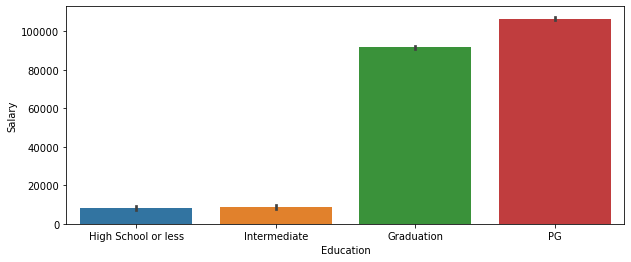

In [59]:
plt.figure(figsize=(10,4))
sns.barplot(x=df['Education'],y=df['Salary'],data=df)


<AxesSubplot:xlabel='Age', ylabel='Salary'>

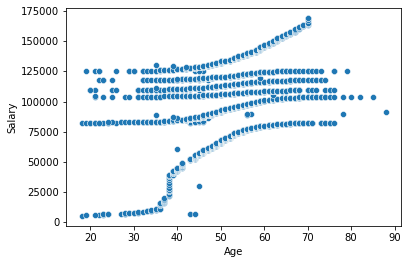

In [60]:
sns.scatterplot(x=df['Age'],y=df['Salary'],data=df)
# here we can analyse that age and salary are related and affecting each other , salary is dependent on the 
#age of employees because in any job with the age exp increses that increses the salary.


<AxesSubplot:xlabel='Months', ylabel='Salary'>

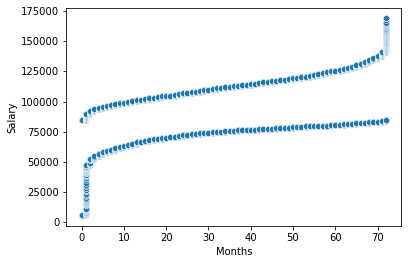

In [61]:
sns.scatterplot(x=df['Months'],y=df['Salary'],data=df)
#here we can say that salary and month of experience is related to each other , as exp increases salary also increases, 
#it is ovbious factor in job in any organiztions.

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

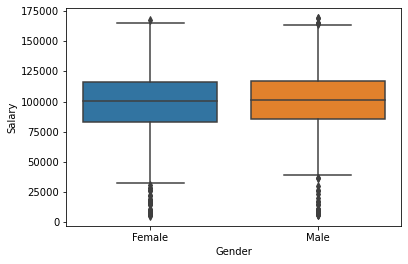

In [62]:
sns.boxplot(x=df['Gender'],y=df['Salary'],data=df)
# Here i can conclude that salary is equally distributed in both male/female.

<AxesSubplot:xlabel='Salary', ylabel='Bonus'>

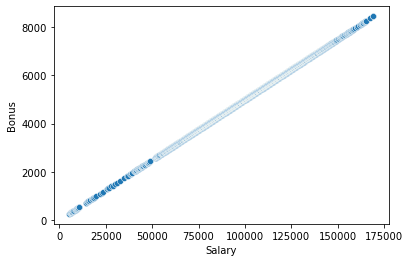

In [63]:
sns.scatterplot(x=df['Salary'],y=df['Bonus'],data=df)
#we can analyse that as salary increses bonus also increses with salary 

<AxesSubplot:xlabel='Total_Sales', ylabel='Salary'>

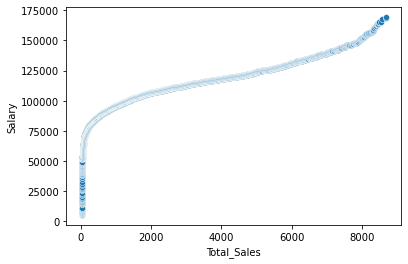

In [64]:
sns.scatterplot(x=df['Total_Sales'],y=df['Salary'],data=df)
#we can see that the relationship between salary and total sales, salary is based on total sales made by an employees.

# Statistical Analysis

I want to check the impact of education on salary here we have one categorical independent variable(Education) and one 
quantitative data dependent variable(salary), i will perform one way anova to tect the effect of education on salary, 
here i consider p (significant level)=0.05

In [90]:
import scipy.stats as stats

In [91]:
#  NULL HYPOTHESIS-H0: There is no impact of Education on Salary
#  ALTERNATIVE HYPOTHESIS-H1: There is a significant impact of Education on Salary
from statsmodels.formula.api import ols  #API focuses on model and frequently used statistical test
import statsmodels.api as sm  #Cross-sectional models and methods
mod = ols('Salary~Education',data=df).fit() 
sm.stats.anova_lm(mod)



#we can see that the p value is greater than 0.05 so we fail to reject the null hypothesis, so we can say there
#is no significant effect of education on salary.

,df,sum_sq,mean_sq,F,PR(>F)
Education,3.0,6.005976e+11,2.001992e+11,399.157982,3.053985e-232
Residual,4957.0,2.486202e+12,5.015538e+08,NaN,NaN


# Feature selection & modelling 

Here there are many feature which have multicolleniarity among them so in this case selectiong the important feature for 
model fitting and result predition, to avoid the overfitting/underfitting problem. so i chose backward elimination method for 
feaure selection that is important for prediction.      

In backward elimination, we start with all the features and removes the least significant feature(based on p value, by default
p value is 0.05)at each iteration which improves the performance of the model.

In [135]:
# to divide train and test set
from sklearn.model_selection import train_test_split  #to avoid the overfitting we split dataset into train/test set

# feature scaling
from sklearn.preprocessing import StandardScaler #making sure that data is internally consistent,assumes that the observations 
                                                  #fit a Gaussian distribution 

# to build the models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# to evaluate the models
from sklearn.metrics import mean_squared_error


In [153]:
features = df.drop('Salary', axis=1)
labels = df['Salary']

# Backward Elimination

In [139]:
from statsmodels.formula.api import ols  # Create a Model from a formula and dataframe.
import statsmodels.api as sm             #The formula.api hosts many of the same functions found in api (e.g. OLS, GLM)
cols=list(x.columns)
pmax=1
while(len(cols)>=0):
    p=[]
    xx=x[cols]
    xx=sm.add_constant(xx)  #Adds a column of ones to the xx array 
    model=sm.OLS(y,xx).fit() #Fit the model,according to the OLS method with a dependent variable(y) and  independent(x)
    p=pd.Series(model.pvalues.values[1:],index=cols)  
    pmax=max(p)
    features_with_p_max=p.idxmax()
    if(pmax>0.05):
        cols.remove(features_with_p_max)  #remove the column which are not significant 
    else:
        break
selected_features=cols
print(selected_features)   #printing the important features list

['Age', 'Bonus', 'openingbalance', 'closingbalance', 'Unit_Sales', 'Total_Sales', 'Months']


In [143]:
ggg=df[['Age', 'Bonus', 'openingbalance', 'closingbalance', 'Unit_Sales', 'Total_Sales', 'Months']]  #feature column 

In [154]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(ggg,labels, test_size = 0.20, random_state = 0)
X_train.shape, X_test.shape


((3968, 7), (993, 7))

In [145]:
scaler=StandardScaler()   #standarization for internal consistency
scaler.fit(X_train)        

StandardScaler()

So absically i have hr related dataset with multiple independent features with one dependent features, and after analysis i   
have to conclude that which features are most essential features that affect the salary or that play major role in salary     
prediction.so  in my opinion here i have to establish the monotonically incresing/decresing relationship between the salary     
and most affecting features.    
here i have to estimate the relationship between two or more independent variables and one dependent variable. and here my target  
colum is continious so i chose the different regression method for analysis.     

here i chose few ML algorithms like linear regression, lasso reg, svm reg, random forest reg and i decided to conclude my result    
based on MSE values as MSE would be less the prediction is more accurate.

LINEAR REGRESSION

In [146]:
reg = LinearRegression()
reg.fit(scaler.transform(X_train), Y_train)

pred =reg.predict(scaler.transform(X_train))
print('linear train mse: {}'.format(mean_squared_error(Y_train, pred)))
pred = reg.predict(scaler.transform(X_test))
print('linear test mse: {}'.format(mean_squared_error(Y_test, pred)))



linear train mse: 1.2914611476870293e-11
linear test mse: 1.2953302483594861e-11


LASSO REGRESSION

In [147]:
lasso_model = Lasso(random_state=2909)
lasso_model.fit(scaler.transform(X_train), Y_train)

pred = lasso_model.predict(scaler.transform(X_train))
print('linear train mse: {}'.format(mean_squared_error(Y_train, pred)))
pred = lasso_model.predict(scaler.transform(X_test))
print('linear test mse: {}'.format(mean_squared_error(Y_test, pred)))

linear train mse: 50.68962523824435
linear test mse: 47.564409134574014


RANDOM FOREST

In [148]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

pred = rf_model.predict(X_train)
print('rf train mse: {}'.format(mean_squared_error(Y_train, pred)))
pred = rf_model.predict(X_test)
print('rf test mse: {}'.format(mean_squared_error(Y_test, pred)))

rf train mse: 1230.6015602307978
rf test mse: 3607.877631385762


SVM

In [149]:
SVR_model = SVR()
SVR_model.fit(scaler.transform(X_train), Y_train)

pred = SVR_model.predict(scaler.transform(X_train))
print('SVR train mse: {}'.format(mean_squared_error(Y_train, pred)))
pred = SVR_model.predict(scaler.transform(X_test))
print('SVR test mse: {}'.format(mean_squared_error(Y_test, pred)))

SVR train mse: 604709183.5768669
SVR test mse: 574968713.556467


# Feature importance

<AxesSubplot:>

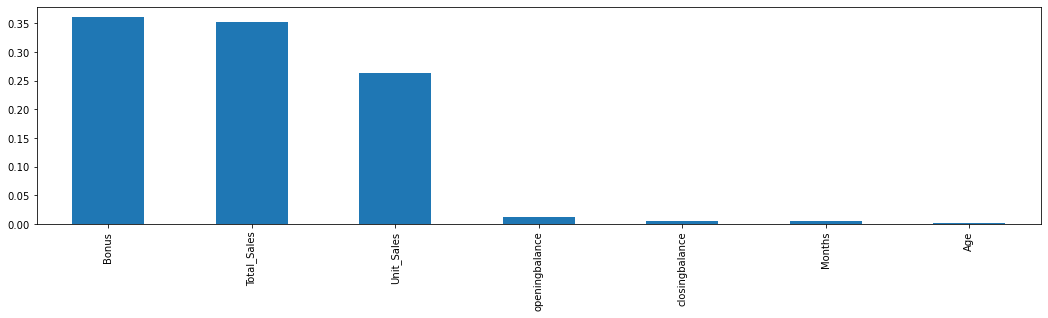

In [150]:
imp= pd.Series(rf_model.feature_importances_)
imp.index = X_train.columns
imp.sort_values(inplace=True, ascending=False)
imp.plot.bar(figsize=(18,4))

#Here we can see that for random forest which features are most important accordingly

<AxesSubplot:>

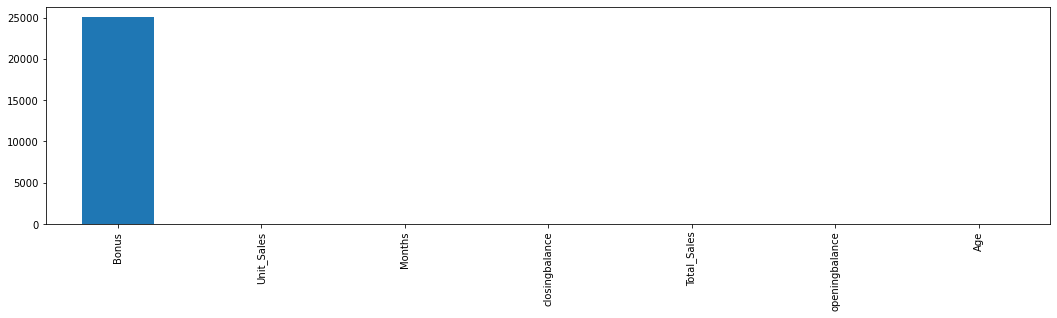

In [151]:
imp = pd.Series(np.abs(reg.coef_.ravel()))
imp.index = X_train.columns
imp.sort_values(inplace=True, ascending=False)
imp.plot.bar(figsize=(18,4))


#Here we can see that for linear regression which features are most important accordingly

In [152]:
df1=pd.DataFrame({'Model':['Linear Regression','Lasso Reagression','Random Forest','SVM'],
                 'Train Mse Score':[1.2914611476870293e-11,50.68962523824435,1292.652841357349,604709183.5768669],
                 'Test Mse Score':[1.2953302483594861e-11,47.564409134574014,2733.1720623705587,574968713.556467]})
df1


#Plotted as dataframe for all model and their train/test mse values

,Model,Train Mse Score,Test Mse Score
0,Linear Regression,1.291461e-11,1.295330e-11
1,Lasso Reagression,5.068963e+01,4.756441e+01
2,Random Forest,1.292653e+03,2.733172e+03
3,SVM,6.047092e+08,5.749687e+08


# Inferences/Findings

1. There ia approximately equal no of male an female employess in this organization
2. There ia more female which have ouw business with the job
3. there is equll qmount of sales is generated with male and female eployees
4. Salary is fairly distributed between the male and female employees
5. Avg salary for male/female is equal
6. most of the employees is graduated and post graduated in this organization
7. There is more fresher employees in the company after that most no of employees are with 5-6 yras experience


# Prediction Conclusion
Various linear and non linear models were applied to the given dataset to predict the reltionship between salary and other considerable
factor that affecting the salary. and we can see Linear regression and random forest performs well than the other models as  mse value is
vary low in llinear reg and random forest so we can say that this model fits the best than other.
so i can conclude that the feature i selected the most affectable factor for the salary. Features that affect the salary are:
['Age', 'Bonus', 'openingbalance', 'closingbalance', 'Unit_Sales', 'Total_Sales', 'Months']



 

# -----------------------------------------------THANK YOU----------------------------------------------